## Dimensionality reduction

In [8]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

import utils ### utils contains several functions to visualize sklearn examples here

# to remove warnings
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

#### The idea
You have a dataset $\{X_i\}_i$ of p-dimensional point and want to find a good d-dimensional representation ($d < p$, ideally $d << p$).

<img src="embedding.jpg" width="850">

### Why do we need DR methods?

#### Large dimensionality (the number of features) of the data leads to 
 - higher number of parameters, 
 - and, sometimes, overfitting;
 - higher computational costs.

#### Interpretability. Everyone wants to understand how ML models work

### Curse of dimensionality

The term **Curse of Dimensionality** refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings.

**Example**:
* in 1-dimensional case we have enough data points, i.e. we don't have "holes";
* if we add 1 dimension, then we have more holes;
* if we add 1 more dimension, than we have even bigger holes.

<img src="curse_of_dimensionality.jpg">

### Interpretability

<img src="explanation.jpg" width="400">



## Methods

### Principal Component Analysis (PCA)

PCA it's a linear dimensionality reduction method which preserve most of the information from the original data.

<img src="PCA.png" width="1000">


From mathematical point of view, we want to solve the following optimization problem

$${\mathbf  {w}}={\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left({\mathbf  {x}}_{{(i)}}\cdot {\mathbf  {w}}\right)^{2}\right\}$$

And the solution is the first eigenvector of $X^TX$ matrix.

![alt text](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2687795/bin/gb-2009-10-1-r7-2.jpg  "PCA for genetic data")

Source: Need, Anna C., et al. "A genome-wide genetic signature of Jewish ancestry perfectly separates individuals with and without full Jewish ancestry in a large random sample of European Americans." Genome biology 10.1 (2009): 1.

Original features are **550,000** polymorphic markers 

### t-SNE

Stochastic Neighbor Embedding (SNE) - it's a nonliear probabalitic DR method

The basic (not exact) idea of the method
 - Let us indtroduce a measure of similarity of two objects $x_j$ and $x_i$ as

$$p_{j\vert i} = \frac{\exp\big(\frac{ - \vert x_i - x_j \vert^2}{\sigma_i^2}\big)}{\sum_{k \neq i} \exp\big(\frac{ - \vert x_i - x_k \vert^2}{\sigma_i^2}\big)}$$

 - We want to find a low dimensional representation $y_i$ of the original vector $x_i$. 
 
 - We can introduce the same meaure of similarities for $y_i$ and $y_j$

$$q_{j\vert i} = \frac{\exp\big(- \vert y_i - y_j \vert^2\big)}{\sum_{k \neq i} \exp\big(- \vert y_i - y_k \vert^2\big)}$$

 - And now we can minimize Kullback-Leibler divergence, a "distance" between distributions:
$${\displaystyle \sum_{i} D_{KL}(P_i||Q_i)=\sum \limits _{i} \sum \limits _{j}p_{j\vert i}\log {\frac {p_{j\vert i}}{q_{j\vert i}}}}.$$

For details, see the original paper: http://www.cs.toronto.edu/~hinton/absps/tsne.pdf

A very nice tutorial on tSNE parameters and interpretation of the results
https://distill.pub/2016/misread-tsne/

##### TODO: play with the perplexity parameter for various datasets

## Supervised Learning

### Linear Discriminant Analysis (LDA)

LDA - is a linear classification method with "embedded" supervised dimensionality reduction

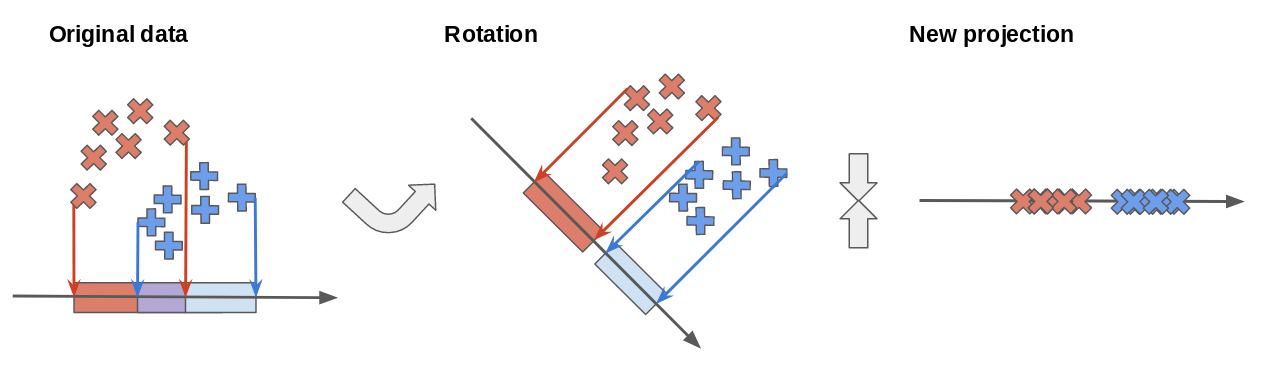

In [33]:
Image('LDA.png')

### Effective (functional) Dimensionality Reduction

EDR is a nonlinear method for supervised dimensionality reduction.

Basic idea
- In addition to standard $Y = f(X)$ we can additionally assume that there is a p-by-d (d<<p) matrix $B$ such that $$B^TB = I_d$$  $$f(x) = \hat f(B^T x)$$
- Then gradients of the function $f(x)$ belongs to span $B$:
$$\nabla_x \space \hat f(B^T x) = B * \nabla_z \space \hat f(z) \Big \vert_{z = B^T x}$$
- The idea - lets build a differentiable supervised model and use it gradients to estimate $B$.

To visualize a difference between Supervised and Unsupervised DR methods lets go through a tutorial

https://github.com/neuro-ml/edr-gp/blob/master/examples/regression.ipynb

## Dimensionality Reduction methods ZOO

### An artificial dataset

standard: 0.12 sec
ltsa: 0.25 sec
hessian: 0.33 sec
modified: 0.26 sec
Isomap: 0.46 sec
MDS: 3.7 sec
SpectralEmbedding: 0.066 sec
t-SNE: 8.4 sec


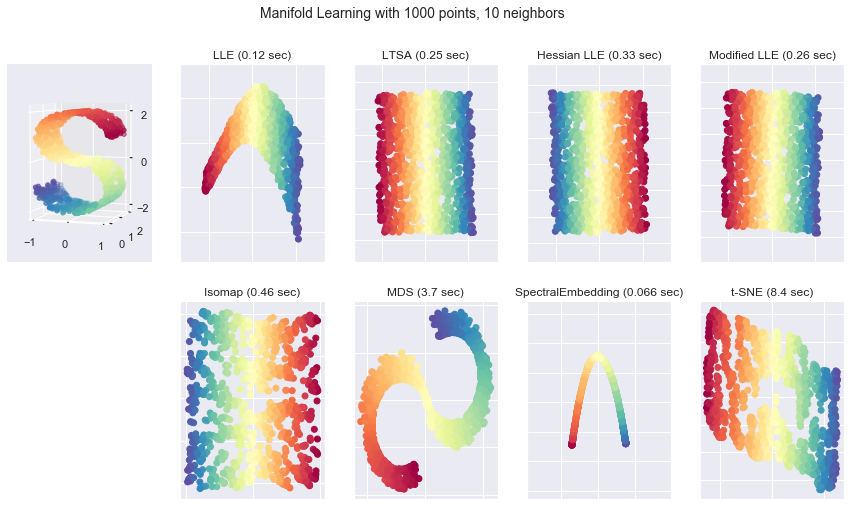

In [3]:
utils.plot_spiral()

## MNIST dataset

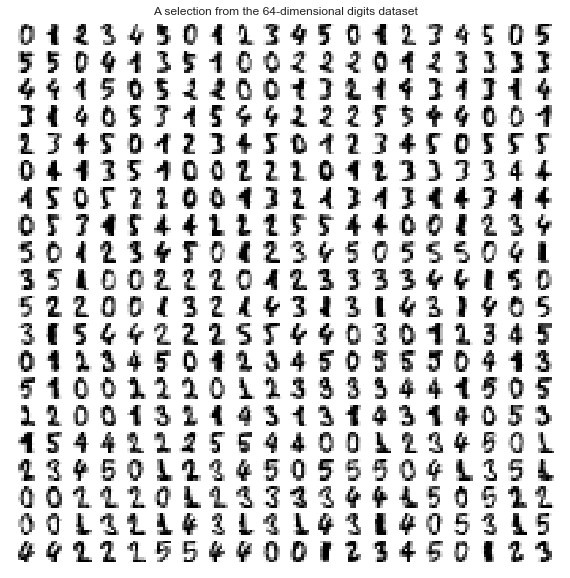

In [4]:
utils.plot_mnist()

Computing random projection
Computing PCA projection
Computing Linear Discriminant Analysis projection
Computing Isomap embedding
Done.
Computing LLE embedding
Done. Reconstruction error: 1.63544e-06
Computing t-SNE embedding


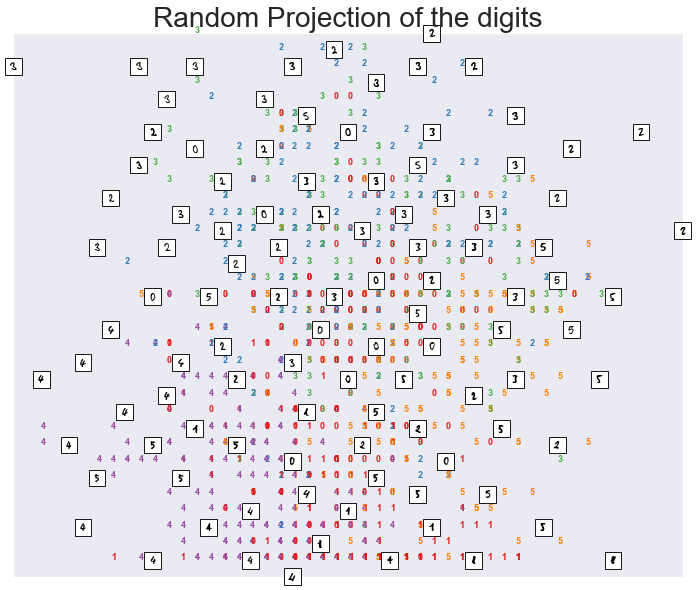

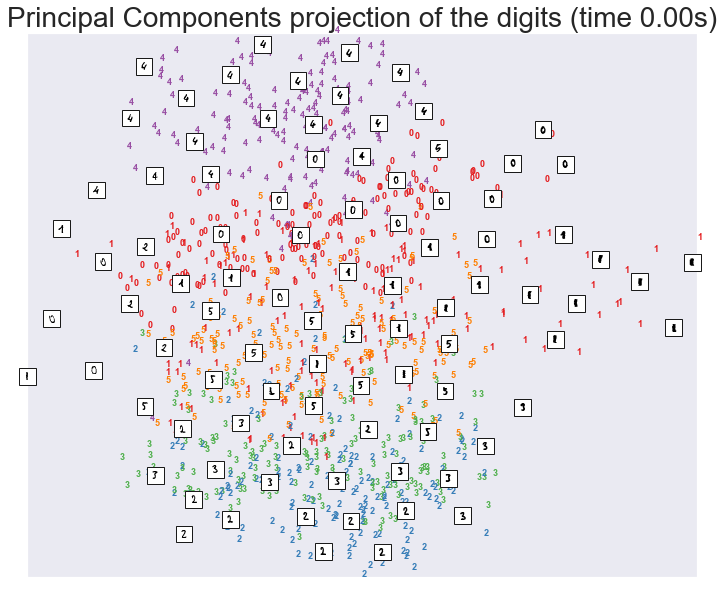

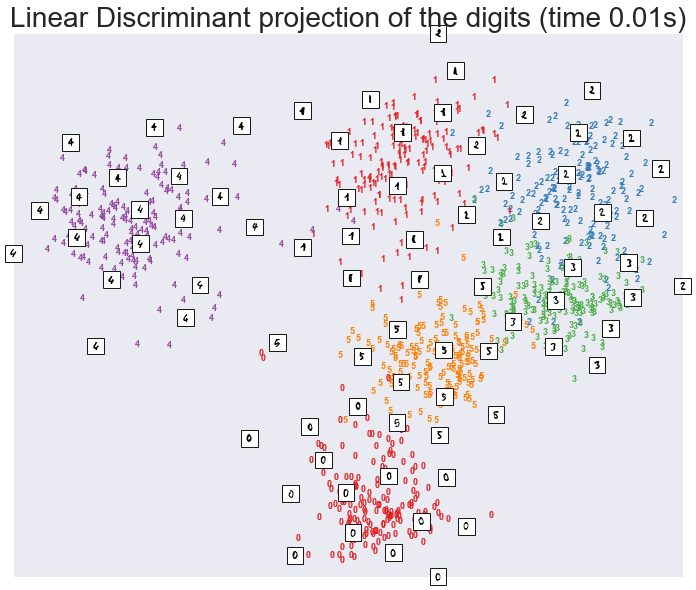

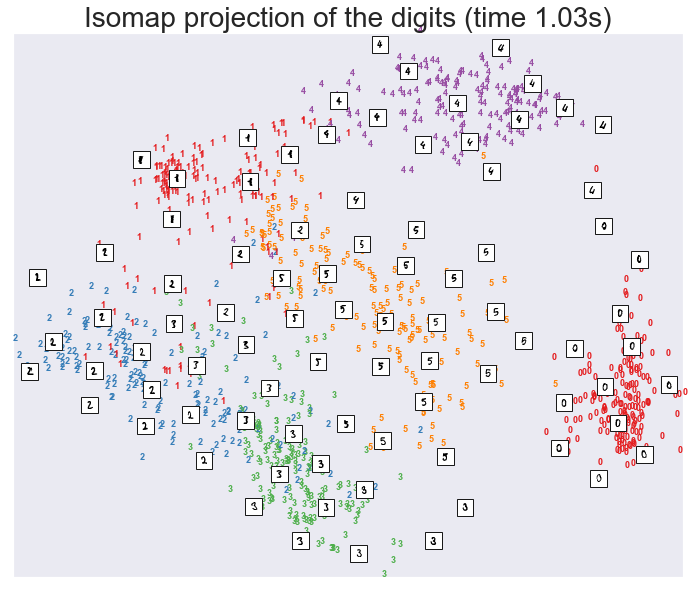

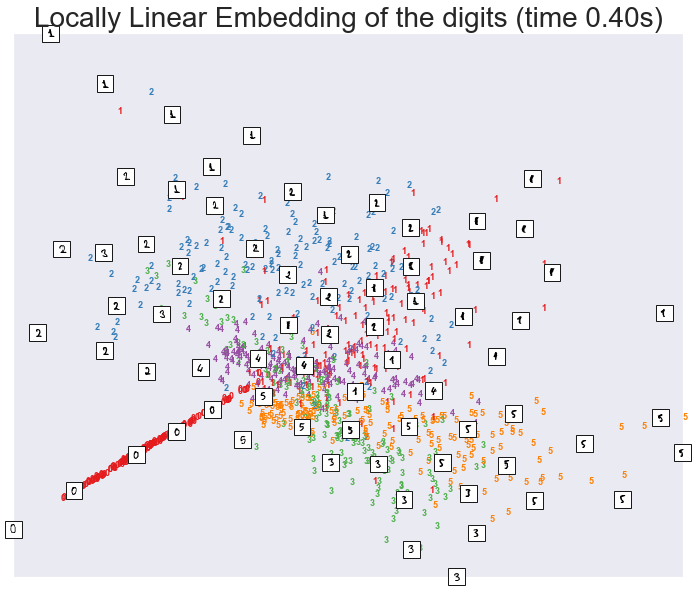

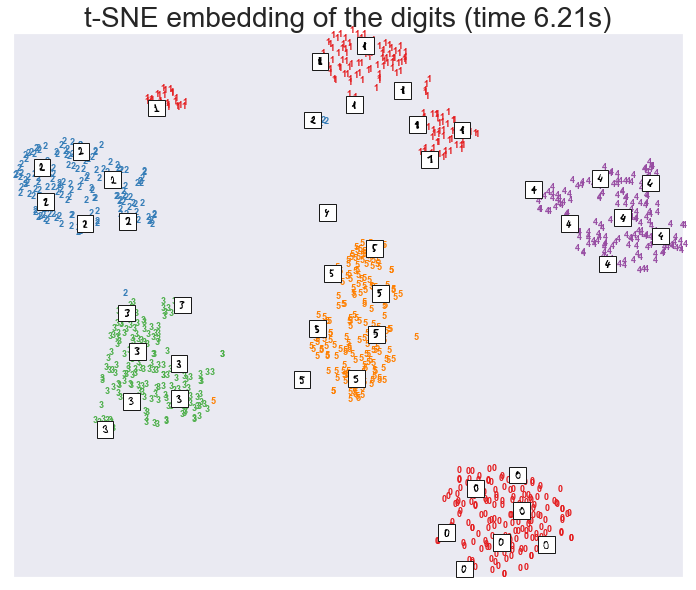

In [5]:
utils.plot_mnist_dr()

### Take away messages
 - For unsupervised learning there are two key methods to consider: PCA and tSNE.
 - Use PCA if dimensionality is high or the number of data samples is small.
 - Interpret tSNE results with care (check https://distill.pub/2016/misread-tsne/ again)
 - There tehcniques for supervised DR, but for nonlinear EDR you can not use sklearn

## Generation on the manifold reconstructed by a DR method

### The Airfoil  dataset

![alt text](https://www.techforspace.com/wp-content/uploads/2016/07/Wing12A.gif   "An airfoil")
Source: quest.nasa.gov

### Load the data 

In [6]:
X = np.loadtxt('airfoils.csv', delimiter=',', usecols = range(57))
test = np.loadtxt('afl_test.csv', delimiter=',')
ref_points = test[0, :] # reference points 
X_test = test[1:, :] # airfoil shape

print(X.shape)
print(X_test.shape)

(199, 57)
(1, 57)


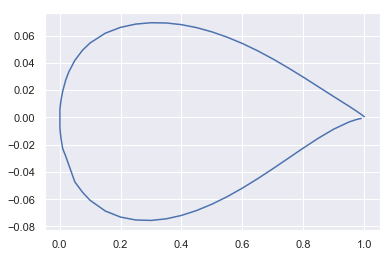

In [9]:
plt.plot(ref_points, X_test[0], label = 'Original')

### Create PCA model

In [16]:
#TODO: initialize & fit PCA model with 2 dimenions (n_components=2)
from sklearn.decomposition import PCA

dimension = 6
pca = PCA(n_components=dimension)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Apply dr model

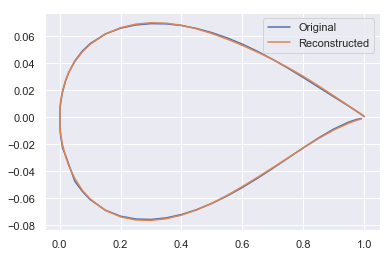

In [20]:
# TODO: apply transform & inferse transform to the X_test
test_afl_compressed = pca.transform(X_test)
test_afl_reconstr = pca.inverse_transform(test_afl_compressed)

plt.plot(ref_points, X_test[0], label='Original')
plt.plot(ref_points, test_afl_reconstr[0], label='Reconstructed')
plt.legend();
plt.show();


### How to select the number of dimensions?

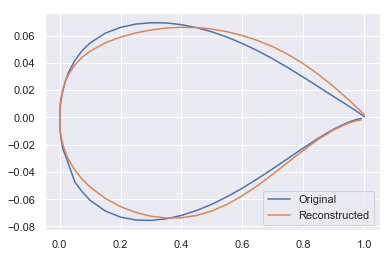

In [24]:
# TODO: analyze (visualy or using MSE) the reconstruction quality for different values of n_components
dimension=3
pca = PCA(n_components=dimension)
pca.fit(X)
test_afl_compressed = pca.transform(X_test)
test_afl_reconstr = pca.inverse_transform(test_afl_compressed)

plt.plot(ref_points, X_test[0], label='Original')
plt.plot(ref_points, test_afl_reconstr[0], label='Reconstructed')
plt.legend();
plt.show();


### We can use the ratio of explained data variability to select the right number of parameters

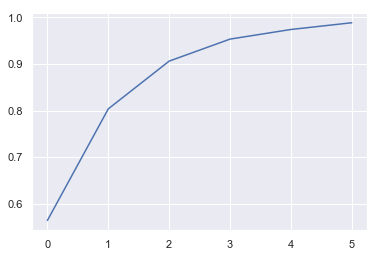

In [15]:
# TODO: plot & analyze pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.show();

## Generate new airfoils

In [25]:
def gen_random_point(X_min, X_max, dim):
    return np.random.rand(dim) * (X_max - X_min) + X_min

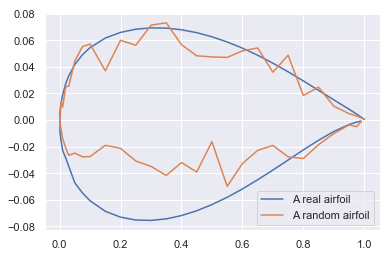

In [26]:
# determine the range in original space
min_afl = np.min(X, 0)
max_afl = np.max(X, 0)

rand_afl = gen_random_point(min_afl, max_afl, 57)
plt.plot(ref_points, X_test[0], label = 'A real airfoil')
plt.plot(ref_points, rand_afl, label = 'A random airfoil')
plt.legend()

### Maybe we can use reduced feature space to generate a better airfoil?

In [29]:
# TODO: generate a random vector in a new (reduced) feature space
# HINT: to identify min and max values you can apply transform to X
# determine the range in compressed space
compressed_airfoils = pca.transform(X)
min_compressed = np.min(compressed_airfoils, 0)
max_compressed = np.max(compressed_airfoils, 0)

# determine the range in original space
min_afl = np.min(X, 0)
max_afl = np.max(X, 0)

# generate airfoils in compressed and original space
print('\nGenerating random airfoils in compressed and original space...')
new_afl_compr = gen_random_point(min_compressed, max_compressed, pca.n_components)
rand_afl = gen_random_point(min_afl, max_afl, 57)


Generating random airfoils in compressed and original space...



Visualizing the generated airfoils...


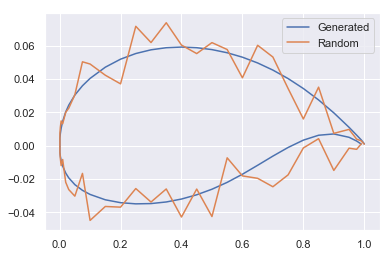

In [30]:
# TODO: Apply the inverse transform to the generated vector and plot the results
# reconstruct to original space
new_afl_reconstr = pca.inverse_transform(new_afl_compr)

# plot the comparison
print('\nVisualizing the generated airfoils...')
plt.plot(ref_points, new_afl_reconstr, label='Generated')
plt.plot(ref_points, rand_afl, label='Random')
plt.legend();
plt.show();


## Summary 

### 1. You need to explain your model in a simple way. 

In this case it may be a good idea to reduce dimensionality up to 2 or 3.
 - **Dataset**: the number of features is several dozens or less.
 - **Recipe**: Standard Scaler + tSNE. 
 - **Advices**: 
       * Play with different values of tSNE perplexity

  - **Recipe**: Standard Scaler + PCA / sparse PCA.
  - **Advice**: 
       * Try a linear model with L1 penalty or feature selection methods as alternatives

### 2. You want to use DR as a part of supervised learning pipeline
If you have a lot of continious features (hundreds) and a small number of data points (comparable with the number of points), DR can be used to unlock nonlinear methods.
  - **Recipe**: StandardScaler + PCA as Transformer, than a nonlinear method (e.g. SVM). 
  - **Advice**: There is a trade-off: less features is better for supervised model training, but more features contains more information. Check the quality for different n_components.